# INTRODUCTION

This project is designed to evaluate avaiation data from the National Transportation Safety Board for the purposes of giving recommendations 
on whether or not to explore the aircraft industry for the purposes of portfolio diversification.

The data being used is from from selected incidents in the United States and International waters.

We look at the following questions that mainly check on the risk observed in order to give three main recommendations :

* As we are analysing data from 1962  to 2023, is there a certain improvent in the aircraft industry? e.g Lower Accidents , Lower Fatalities , Lower
  Injuries.
* Which purposes for using an aircraft exhbit the lowest risk?
* Which type of aircraft it tired to the lower risks (Accidents, Injuries and Fatalities)? 

### Data Understanding

In this repository under the file path `AviationData.csv` there is a CSV file containing information about various characters from superhero media properties.

This data has been downloaded from here: https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses


### Requirements

#### 1. Load and Preview the data set

#### 2. Clean the Relevant Columns

#### 3. Create Plots and Visualizations

#### 4. Give recommendations

#### 5. Give Conclusions


In [2]:
# import pandas for the purposes of executing data cleaning and data analysis
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt


#### Step 1:  Load and Preview data set

In [4]:
# 1.1 : This is the first step which is to extract the Aviation.csv dataset from Kaggel website as indicated in the above introduction
# 1.2 : Call the first 10 rows of the data set

df = pd.read_csv(r'C:\Users\tracy\OneDrive\Desktop\Project_data\AviationData.csv', encoding='Latin1', low_memory=False)
df.head(10)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [5]:
# 1.3 : This code allows one to view the last five rows in the data 

df.tail(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88879,20221219106472,Accident,DCA23LA096,2022-12-18,"Kahului, HI",United States,NaN,NaN,NaN,NaN,...,NaN,HAWAIIAN AIRLINES INC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88880,20221219106477,Accident,WPR23LA071,2022-12-18,"San Manual, AZ",United States,NaN,NaN,NaN,NaN,...,Personal,Chandler Air Service,0.0,0.0,0.0,3.0,NaN,NaN,NaN,20-12-2022
88881,20221221106483,Accident,CEN23LA067,2022-12-21,"Auburn Hills, MI",United States,NaN,NaN,NaN,NaN,...,Personal,Pilot,0.0,1.0,0.0,0.0,NaN,NaN,NaN,22-12-2022
88882,20221222106486,Accident,CEN23LA068,2022-12-21,"Reserve, LA",United States,NaN,NaN,NaN,NaN,...,Instructional,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,27-12-2022
88883,20221228106502,Accident,GAA23WA046,2022-12-22,"Brasnorte,",Brazil,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,28-12-2022
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [6]:
#1.4 : The code below allows one to extract a summary of the number of rows and columns in the Aviation.csv dataset

df.shape

(88889, 31)

In [7]:
#1.5 : This code gives a summary of the composition of the Aviation.csv dataset ; 
     #for example, one can see the name of the columns, data types and count of non-null values in each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

* #### From the infromation above we are able to see that a number of columns have null or NaNs
* #### Thus, inorder to proceed with our analysis we need to fix the issue of missing data especially in the data we will be using for analyses

In [9]:
#1.6 : Returns the index information of the dataframe in question

df.index

RangeIndex(start=0, stop=88889, step=1)

In [10]:
#1.7 : Returns the names of the columns / title of each column in our dataframe

df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [11]:
#1.8 : Returns the data tyoes of all columns in our dataframe
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [12]:
#1.9 : Find the statistical description of the columns of the dataframe where numerical values are captured

df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


#### Step 2:  Data Cleaning

#### A. The data cleaning process will entail:
     * Creating a copy of the original data and extracting necessary columns for cleaning and analysis
     * Checking for duplicates 
     * Checking for missing values
     * Handling missing values accordingly
     * Creating a new csv file for Tableau visualization
     * Note : comments have been added where necessary to aid in further understanding of the data


##### B.The data that we need in our dataframe includes :
 * Investigation.Type
 * Event.Date
 * Location
 * Country
 * Injury.Severity
 * Aircraft.damage
 * Aircraft.Category
 * Amateur.Built 
 * Number.of.Engines
 * Engine.Type
 * Purpose.of.flight
 * Total.Fatal.Injuries
 * Total.Serious.Injuries
 * Total.Minor.Injuries 
 * Total.Uninjured

In [15]:
#2.1 : Create a copy of the original data to preserve original data

df_clean = df.copy()
df_clean.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [16]:
#2.2 : Check for duplicates in the entire data
# This shows us that there are no duplicates, however in the next cells , 
# ..we find dulicates for the relevant columns that we will need for our valuation

df_clean.duplicated().value_counts()


False    88889
Name: count, dtype: int64

In [17]:
#2.3 : capture the columns that we want to use in for data cleaning and data analyses. Create a new data set for analyses
   #Preview the new data set

relevant_columns = [ "Event.Id",
                    "Investigation.Type",
                     "Event.Date",
                     "Location",
                     "Country",
                     "Injury.Severity",
                     "Aircraft.damage",
                     "Aircraft.Category",
                     "Amateur.Built",
                     "Number.of.Engines",
                     "Engine.Type",
                     "Purpose.of.flight",
                     "Total.Fatal.Injuries",
                     "Total.Serious.Injuries",
                     "Total.Minor.Injuries",
                     "Total.Uninjured"]

In [18]:
#2.4 : Using the relevant columns create a new dataframe that we will use for analyses

df_analyses =df_clean[relevant_columns]
df_analyses.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0


In [19]:
#2.5 : Check for duplicates in the new data frame

df_analyses_dupli = df_analyses[df_analyses.duplicated(keep=False,subset =(relevant_columns))]
df_analyses_dupli

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
254,20020917X02402,Accident,1982-02-07,"W. OF HOMESTEAD, FL",United States,Fatal(8),Destroyed,Airplane,No,1.0,Reciprocating,Personal,8.0,0.0,0.0,0.0
255,20020917X02402,Accident,1982-02-07,"W. OF HOMESTEAD, FL",United States,Fatal(8),Destroyed,Airplane,No,1.0,Reciprocating,Personal,8.0,0.0,0.0,0.0
844,20020917X02282,Accident,1982-04-15,"TULARE, CA",United States,Fatal(1),Substantial,Glider,No,0.0,Unknown,Personal,1.0,1.0,0.0,0.0
845,20020917X02282,Accident,1982-04-15,"TULARE, CA",United States,Fatal(1),Substantial,Glider,No,0.0,Unknown,Personal,1.0,1.0,0.0,0.0
1370,20020917X02935,Accident,1982-05-28,"EVANSVILLE, IN",United States,Non-Fatal,Substantial,Airplane,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88513,20220915105950,Accident,2022-09-11,"Chicago, IL",United States,NaN,NaN,NaN,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0
88527,20220921105978,Incident,2022-09-14,"Mumbai,",India,NaN,NaN,Airplane,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0
88528,20220921105978,Incident,2022-09-14,"Mumbai,",India,NaN,NaN,Airplane,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0
88797,20221122106340,Incident,2022-11-18,"Marrakech,",Morocco,NaN,NaN,NaN,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [20]:
#2.5 : Since we have found duplicates exit, here we check if the number of duplicates are significant
       # Duplicates are not signficant compared to the total data being used, therefore removing the duplicates can be exercised
       # but is expected not to have a major impact

df_analyses.duplicated().value_counts()

False    88664
True       225
Name: count, dtype: int64

In [21]:
#2.6 : Check the rows that have duplicates before we remove the duplicates

df_analyses_dupli.shape

(450, 16)

In [22]:
#2.7 : Remove duplicates but keep the first instance of the duplicates

df_analyses = df_analyses.drop_duplicates(keep='first')
df_analyses.duplicated().value_counts()

False    88664
Name: count, dtype: int64

In [23]:
#2.8 : Check if we have duplicates after droping duplicates

df_analyses_dupli = df_analyses[df_analyses.duplicated(keep=False,subset =(relevant_columns))]
df_analyses_dupli

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured


In [24]:
#2.9 : Check details of metadata in our data

df_analyses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88664 entries, 0 to 88888
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88664 non-null  object 
 1   Investigation.Type      88664 non-null  object 
 2   Event.Date              88664 non-null  object 
 3   Location                88612 non-null  object 
 4   Country                 88438 non-null  object 
 5   Injury.Severity         87671 non-null  object 
 6   Aircraft.damage         85499 non-null  object 
 7   Aircraft.Category       32263 non-null  object 
 8   Amateur.Built           88562 non-null  object 
 9   Number.of.Engines       82609 non-null  float64
 10  Engine.Type             81594 non-null  object 
 11  Purpose.of.flight       82504 non-null  object 
 12  Total.Fatal.Injuries    77303 non-null  float64
 13  Total.Serious.Injuries  76209 non-null  float64
 14  Total.Minor.Injuries    76784 non-null  flo

 * #### From the info of the meta data we can see that only the Investigation.Type and Event.Date columns dont have null values / NaNS ?Missing values
 * #### We will now begin the process of cleaning the other columns that have nulls /NaNs /missing values

In [26]:
# 2.10 :  First we start by detecting missing data

df_analyses.isna().sum()

Event.Id                      0
Investigation.Type            0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity             993
Aircraft.damage            3165
Aircraft.Category         56401
Amateur.Built               102
Number.of.Engines          6055
Engine.Type                7070
Purpose.of.flight          6160
Total.Fatal.Injuries      11361
Total.Serious.Injuries    12455
Total.Minor.Injuries      11880
Total.Uninjured            5894
dtype: int64

In [27]:
# 2.11 Cleaning column Event date
  # create new columns to show the changed version of Event.Date to date formart, and a new column for the years

df_analyses['cleaned_event_dates'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df_analyses['cleaned_event_dates']

0       1948-10-24
1       1962-07-19
2       1974-08-30
3       1977-06-19
4       1979-08-02
           ...    
88884   2022-12-26
88885   2022-12-26
88886   2022-12-26
88887   2022-12-26
88888   2022-12-29
Name: cleaned_event_dates, Length: 88664, dtype: datetime64[ns]

In [28]:
# 2.12 : Create a new column to get the year from the event dates 
   # Years can use this information to check various data items and their behaviour over the years

df_analyses['year_of_event'] = df_analyses['cleaned_event_dates'].dt.year
df_analyses['year_of_event'] 

#df['month'] = df['cleaned_dates'].dt.month
#df['day'] = df['cleaned_dates'].dt.day

0        1948
1        1962
2        1974
3        1977
4        1979
         ... 
88884    2022
88885    2022
88886    2022
88887    2022
88888    2022
Name: year_of_event, Length: 88664, dtype: int32

In [29]:
# 2.13 : Check for years before 1962

df_analyses[df_analyses['year_of_event'] < 1962]

# since one can see one entry that has the wrong year , we can ignore this as it will not have any significant impact

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,cleaned_event_dates,year_of_event
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,1948-10-24,1948


In [30]:
# 2.14 : Cleaning column Investigation.Type
       # Check the unique categories
       
df_analyses['Investigation.Type'].unique()

# Since there are no NaNs, this data doesnt neef further cleaning

array(['Accident', 'Incident'], dtype=object)

In [31]:
# 2:15 : Cleaning column Injury.Severity
       #Check distribution of categories
df_analyses['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal     67240
Fatal(1)       6155
Fatal          5262
Fatal(2)       3688
Incident       2184
              ...  
Fatal(169)        1
Fatal(88)         1
Fatal(43)         1
Fatal(60)         1
Fatal(230)        1
Name: count, Length: 109, dtype: int64

In [32]:
# 2:16: Cleaning column Injury.Severity
       #Check mode
mode_injury_severity = df_analyses['Injury.Severity'].mode()[0]
mode_injury_severity

'Non-Fatal'

In [33]:
# 2:16 : As we cam see majority of the data in Injury Severity falls under Non-Fatal
# We can therefore replace in a new column the NaNs to Non-Fatal
# But first convert the NaNs to UNKNOWN to a new column thus maintaining the original Injury.Severity column

df_analyses['injury_severity1']= df_analyses[['Injury.Severity']].fillna(value = "unknown")
df_analyses['injury_severity1']

0         Fatal(2)
1         Fatal(4)
2         Fatal(3)
3         Fatal(2)
4         Fatal(1)
           ...    
88884        Minor
88885      unknown
88886    Non-Fatal
88887      unknown
88888        Minor
Name: injury_severity1, Length: 88664, dtype: object

In [34]:
# 2:17 : Now create a new column by removing NaNs using the modal Injury.Severity

df_analyses['injury_severity2']= df_analyses[['Injury.Severity']].fillna(mode_injury_severity)
df_analyses['injury_severity2']

0         Fatal(2)
1         Fatal(4)
2         Fatal(3)
3         Fatal(2)
4         Fatal(1)
           ...    
88884        Minor
88885    Non-Fatal
88886    Non-Fatal
88887    Non-Fatal
88888        Minor
Name: injury_severity2, Length: 88664, dtype: object

In [35]:
# 2:18 : Check if there are NaNs in the new column
df_analyses['injury_severity2'].isna().sum()

0

In [36]:
# 2:19 : Extract "Fatal" and the number, handling cases without "Fatal" thuse create two new columns

df_analyses['category_injury_severity'] = df_analyses['injury_severity2'].apply(lambda x: 'Fatal' if x.startswith('Fatal') else x)
df_analyses['number_of_fatality'] = df_analyses['injury_severity2'].str.extract(r'Fatal\((\d+)\)')


In [37]:
# 2:20 : Subtitue any NaNs with 0 in the number_of_fatality column

df_analyses['number_of_fatality'] = df_analyses['number_of_fatality'].fillna(0).astype(int)
df_analyses['number_of_fatality']

0        2
1        4
2        3
3        2
4        1
        ..
88884    0
88885    0
88886    0
88887    0
88888    0
Name: number_of_fatality, Length: 88664, dtype: int32

In [38]:
# 2:21 : Check if there are NaNs, also check the categories left after the split above

df_analyses['category_injury_severity'].unique()

# No Missing Values detected

array(['Fatal', 'Non-Fatal', 'Incident', 'Unavailable', 'Minor',
       'Serious'], dtype=object)

In [39]:
# 2:22 : Check data in column to see if there are any NaNs

df_analyses['number_of_fatality'].unique()
# No Missing Values detected

array([  2,   4,   3,   1,   0,   8,  78,   7,   6,   5, 153,  12,  14,
        23,  10,  11,   9,  17,  13,  29,  70, 135,  31, 256,  25,  82,
       156,  28,  18,  43,  15, 270, 144, 174, 111, 131,  20,  73,  27,
        34,  87,  30,  16,  47,  56,  37, 132,  68,  54,  52,  65,  72,
       160, 189, 123,  33, 110, 230,  97, 349, 125,  35, 228,  75, 104,
       229,  80, 217, 169,  88,  19,  60, 113, 143,  83,  24,  44,  64,
        92, 118, 265,  26, 138, 206,  71,  21,  46, 102, 115, 141,  55,
       121,  45, 145, 117, 107, 124,  49, 154,  96, 114, 199,  89,  57])

In [40]:
#2.23 Clean Total.Fatal.Injuries column
# Check data type 
df_analyses['Total.Fatal.Injuries'].dtype

dtype('float64')

In [41]:
#2.24 Create a new column identifing the missing values

df_analyses['Total.Fatal.Injuries1'] = df_analyses['Total.Fatal.Injuries'].fillna(value="Unknown")
df_analyses.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Amateur.Built,Number.of.Engines,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,cleaned_event_dates,year_of_event,injury_severity1,injury_severity2,category_injury_severity,number_of_fatality,Total.Fatal.Injuries1
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,No,1.0,...,0.0,0.0,0.0,1948-10-24,1948,Fatal(2),Fatal(2),Fatal,2,2.0
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,No,1.0,...,0.0,0.0,0.0,1962-07-19,1962,Fatal(4),Fatal(4),Fatal,4,4.0
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,No,1.0,...,NaN,NaN,NaN,1974-08-30,1974,Fatal(3),Fatal(3),Fatal,3,3.0
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,No,1.0,...,0.0,0.0,0.0,1977-06-19,1977,Fatal(2),Fatal(2),Fatal,2,2.0
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,No,NaN,...,2.0,NaN,0.0,1979-08-02,1979,Fatal(1),Fatal(1),Fatal,1,1.0


In [42]:
#2.24 Create a new column that replaces the missing values , here we replace with 0 so that we can get mean or median or mode

df_analyses['Total.Fatal.Injuries2'] = df_analyses['Total.Fatal.Injuries'].fillna(value=0)
df_analyses.head(10)

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Amateur.Built,Number.of.Engines,...,Total.Minor.Injuries,Total.Uninjured,cleaned_event_dates,year_of_event,injury_severity1,injury_severity2,category_injury_severity,number_of_fatality,Total.Fatal.Injuries1,Total.Fatal.Injuries2
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,No,1.0,...,0.0,0.0,1948-10-24,1948,Fatal(2),Fatal(2),Fatal,2,2.0,2.0
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,No,1.0,...,0.0,0.0,1962-07-19,1962,Fatal(4),Fatal(4),Fatal,4,4.0,4.0
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,No,1.0,...,NaN,NaN,1974-08-30,1974,Fatal(3),Fatal(3),Fatal,3,3.0,3.0
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,No,1.0,...,0.0,0.0,1977-06-19,1977,Fatal(2),Fatal(2),Fatal,2,2.0,2.0
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,No,NaN,...,NaN,0.0,1979-08-02,1979,Fatal(1),Fatal(1),Fatal,1,1.0,1.0
5,20170710X52551,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,No,2.0,...,1.0,44.0,1979-09-17,1979,Non-Fatal,Non-Fatal,Non-Fatal,0,Unknown,0.0
6,20001218X45446,Accident,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,NaN,No,1.0,...,0.0,0.0,1981-08-01,1981,Fatal(4),Fatal(4),Fatal,4,4.0,4.0
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,No,1.0,...,0.0,2.0,1982-01-01,1982,Non-Fatal,Non-Fatal,Non-Fatal,0,0.0,0.0
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,No,2.0,...,0.0,2.0,1982-01-01,1982,Non-Fatal,Non-Fatal,Non-Fatal,0,0.0,0.0
9,20020909X01560,Accident,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,NaN,No,1.0,...,3.0,0.0,1982-01-01,1982,Non-Fatal,Non-Fatal,Non-Fatal,0,0.0,0.0


In [43]:
#2.25 Check the data type of the new column to know if we can get the mean , median or mode

df_analyses['Total.Fatal.Injuries2'].dtype

dtype('float64')

In [44]:
#2.26 In this case we are going to use mean to replace the missing values

mean_total_Fatal_injuries = df_analyses['Total.Fatal.Injuries2'].mean()
mean_total_Fatal_injuries

0.5591784715329784

In [45]:
#2.27 Replace missing values with mean

df_analyses['Total.Fatal.Injuries3'] = round(df_analyses['Total.Fatal.Injuries'].fillna(mean_total_Fatal_injuries),1)
df_analyses.head(10)

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Amateur.Built,Number.of.Engines,...,Total.Uninjured,cleaned_event_dates,year_of_event,injury_severity1,injury_severity2,category_injury_severity,number_of_fatality,Total.Fatal.Injuries1,Total.Fatal.Injuries2,Total.Fatal.Injuries3
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,No,1.0,...,0.0,1948-10-24,1948,Fatal(2),Fatal(2),Fatal,2,2.0,2.0,2.0
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,No,1.0,...,0.0,1962-07-19,1962,Fatal(4),Fatal(4),Fatal,4,4.0,4.0,4.0
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,No,1.0,...,NaN,1974-08-30,1974,Fatal(3),Fatal(3),Fatal,3,3.0,3.0,3.0
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,No,1.0,...,0.0,1977-06-19,1977,Fatal(2),Fatal(2),Fatal,2,2.0,2.0,2.0
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,No,NaN,...,0.0,1979-08-02,1979,Fatal(1),Fatal(1),Fatal,1,1.0,1.0,1.0
5,20170710X52551,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,No,2.0,...,44.0,1979-09-17,1979,Non-Fatal,Non-Fatal,Non-Fatal,0,Unknown,0.0,0.6
6,20001218X45446,Accident,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,NaN,No,1.0,...,0.0,1981-08-01,1981,Fatal(4),Fatal(4),Fatal,4,4.0,4.0,4.0
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,No,1.0,...,2.0,1982-01-01,1982,Non-Fatal,Non-Fatal,Non-Fatal,0,0.0,0.0,0.0
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,No,2.0,...,2.0,1982-01-01,1982,Non-Fatal,Non-Fatal,Non-Fatal,0,0.0,0.0,0.0
9,20020909X01560,Accident,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,NaN,No,1.0,...,0.0,1982-01-01,1982,Non-Fatal,Non-Fatal,Non-Fatal,0,0.0,0.0,0.0


In [46]:
#2.28 Cleaning column Total.Serious.Injuries
df_analyses['Total.Serious.Injuries']


0        0.0
1        0.0
2        NaN
3        0.0
4        2.0
        ... 
88884    1.0
88885    0.0
88886    0.0
88887    0.0
88888    1.0
Name: Total.Serious.Injuries, Length: 88664, dtype: float64

In [47]:
#2.29 Replace missing values in a new duplicated column Total Serious Injuries

df_analyses['Total.Serious.Injuries1'] = df_analyses['Total.Serious.Injuries'].fillna(value="unknown")
df_analyses.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Amateur.Built,Number.of.Engines,...,cleaned_event_dates,year_of_event,injury_severity1,injury_severity2,category_injury_severity,number_of_fatality,Total.Fatal.Injuries1,Total.Fatal.Injuries2,Total.Fatal.Injuries3,Total.Serious.Injuries1
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,No,1.0,...,1948-10-24,1948,Fatal(2),Fatal(2),Fatal,2,2.0,2.0,2.0,0.0
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,No,1.0,...,1962-07-19,1962,Fatal(4),Fatal(4),Fatal,4,4.0,4.0,4.0,0.0
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,No,1.0,...,1974-08-30,1974,Fatal(3),Fatal(3),Fatal,3,3.0,3.0,3.0,unknown
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,No,1.0,...,1977-06-19,1977,Fatal(2),Fatal(2),Fatal,2,2.0,2.0,2.0,0.0
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,No,NaN,...,1979-08-02,1979,Fatal(1),Fatal(1),Fatal,1,1.0,1.0,1.0,2.0


In [48]:
#2.30 Create a new column for Total Serious injuries and replace the missing values with 0 

df_analyses['Total.Serious.Injuries2'] = df_analyses['Total.Serious.Injuries'].fillna(value=0)
df_analyses['Total.Serious.Injuries2'].head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    2.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: Total.Serious.Injuries2, dtype: float64

In [49]:
#2.31 calculate mean for the new column above

mean_total_Serious_injuries = df_analyses['Total.Serious.Injuries2'].mean()
mean_total_Serious_injuries

0.24071776594784805

In [50]:
#2.32 In this case we are going to use mean to replace the missing values

df_analyses['Total.Serious.Injuries3'] = round(df_analyses['Total.Serious.Injuries'].fillna(mean_total_Serious_injuries),1)
df_analyses.head(10)

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Amateur.Built,Number.of.Engines,...,injury_severity1,injury_severity2,category_injury_severity,number_of_fatality,Total.Fatal.Injuries1,Total.Fatal.Injuries2,Total.Fatal.Injuries3,Total.Serious.Injuries1,Total.Serious.Injuries2,Total.Serious.Injuries3
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,No,1.0,...,Fatal(2),Fatal(2),Fatal,2,2.0,2.0,2.0,0.0,0.0,0.0
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,No,1.0,...,Fatal(4),Fatal(4),Fatal,4,4.0,4.0,4.0,0.0,0.0,0.0
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,No,1.0,...,Fatal(3),Fatal(3),Fatal,3,3.0,3.0,3.0,unknown,0.0,0.2
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,No,1.0,...,Fatal(2),Fatal(2),Fatal,2,2.0,2.0,2.0,0.0,0.0,0.0
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,No,NaN,...,Fatal(1),Fatal(1),Fatal,1,1.0,1.0,1.0,2.0,2.0,2.0
5,20170710X52551,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,No,2.0,...,Non-Fatal,Non-Fatal,Non-Fatal,0,Unknown,0.0,0.6,unknown,0.0,0.2
6,20001218X45446,Accident,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,NaN,No,1.0,...,Fatal(4),Fatal(4),Fatal,4,4.0,4.0,4.0,0.0,0.0,0.0
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,No,1.0,...,Non-Fatal,Non-Fatal,Non-Fatal,0,0.0,0.0,0.0,0.0,0.0,0.0
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,No,2.0,...,Non-Fatal,Non-Fatal,Non-Fatal,0,0.0,0.0,0.0,0.0,0.0,0.0
9,20020909X01560,Accident,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,NaN,No,1.0,...,Non-Fatal,Non-Fatal,Non-Fatal,0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
#2.33 Cleaning column Total.Minor.Injuries

df_analyses['Total.Minor.Injuries'].dtype


dtype('float64')

In [52]:
#2.34 Replace missing values with word unknown in a new duplicated column for column Total.Minor.Injuries

df_analyses['Total.Minor.Injuries1'] = df_analyses['Total.Minor.Injuries'].fillna(value="unknown")
df_analyses['Total.Minor.Injuries1'].head()

0        0.0
1        0.0
2    unknown
3        0.0
4    unknown
Name: Total.Minor.Injuries1, dtype: object

In [53]:
#2.35 Create another duplicate column and replace ,issing values with 0

df_analyses['Total.Minor.Injuries2'] = df_analyses['Total.Minor.Injuries'].fillna(value=0)
df_analyses.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Amateur.Built,Number.of.Engines,...,category_injury_severity,number_of_fatality,Total.Fatal.Injuries1,Total.Fatal.Injuries2,Total.Fatal.Injuries3,Total.Serious.Injuries1,Total.Serious.Injuries2,Total.Serious.Injuries3,Total.Minor.Injuries1,Total.Minor.Injuries2
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,No,1.0,...,Fatal,2,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,No,1.0,...,Fatal,4,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,No,1.0,...,Fatal,3,3.0,3.0,3.0,unknown,0.0,0.2,unknown,0.0
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,No,1.0,...,Fatal,2,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,No,NaN,...,Fatal,1,1.0,1.0,1.0,2.0,2.0,2.0,unknown,0.0


In [54]:
#2.36 Calculate mean of the above column created

mean_total_Minor_injuries = df_analyses['Total.Minor.Injuries2'].mean()
mean_total_Minor_injuries

0.3087498872146531

In [55]:
#2.37 Use mean above to replace the missing values

df_analyses['Total.Minor.Injuries3'] = round(df_analyses['Total.Minor.Injuries'].fillna(mean_total_Minor_injuries),1)
df_analyses.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Amateur.Built,Number.of.Engines,...,number_of_fatality,Total.Fatal.Injuries1,Total.Fatal.Injuries2,Total.Fatal.Injuries3,Total.Serious.Injuries1,Total.Serious.Injuries2,Total.Serious.Injuries3,Total.Minor.Injuries1,Total.Minor.Injuries2,Total.Minor.Injuries3
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,No,1.0,...,2,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,No,1.0,...,4,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,No,1.0,...,3,3.0,3.0,3.0,unknown,0.0,0.2,unknown,0.0,0.3
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,No,1.0,...,2,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,No,NaN,...,1,1.0,1.0,1.0,2.0,2.0,2.0,unknown,0.0,0.3


In [56]:
#2.38 ADD THE COLUMNS Total.Minor.Injuries3, Total.Fatal.Injuries3, Total.Serious.Injuries3 TO CREATE A NEW COLUMN

df_analyses['Total.Injuries'] = df_analyses['Total.Minor.Injuries3']+df_analyses['Total.Fatal.Injuries3']+df_analyses['Total.Serious.Injuries3']
df_analyses

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Amateur.Built,Number.of.Engines,...,Total.Fatal.Injuries1,Total.Fatal.Injuries2,Total.Fatal.Injuries3,Total.Serious.Injuries1,Total.Serious.Injuries2,Total.Serious.Injuries3,Total.Minor.Injuries1,Total.Minor.Injuries2,Total.Minor.Injuries3,Total.Injuries
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,No,1.0,...,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,No,1.0,...,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,No,1.0,...,3.0,3.0,3.0,unknown,0.0,0.2,unknown,0.0,0.3,3.5
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,No,1.0,...,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,No,NaN,...,1.0,1.0,1.0,2.0,2.0,2.0,unknown,0.0,0.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,No,NaN,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
88885,20221227106494,Accident,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,No,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88886,20221227106497,Accident,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,No,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88887,20221227106498,Accident,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,No,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
#2.39 Cleaning column - Aircraft.damage
df_analyses['Aircraft.damage'].isna().sum()


3165

In [58]:
#2.40 Check Unique values

df_analyses['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', nan, 'Unknown'], dtype=object)

In [59]:
#2.41 Create new column and replace missing values with word unknown

df_analyses['Aircraft.damage1'] = df_analyses['Aircraft.damage'].fillna(value="unknown1")
df_analyses

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Amateur.Built,Number.of.Engines,...,Total.Fatal.Injuries2,Total.Fatal.Injuries3,Total.Serious.Injuries1,Total.Serious.Injuries2,Total.Serious.Injuries3,Total.Minor.Injuries1,Total.Minor.Injuries2,Total.Minor.Injuries3,Total.Injuries,Aircraft.damage1
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,No,1.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Destroyed
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,No,1.0,...,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Destroyed
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,No,1.0,...,3.0,3.0,unknown,0.0,0.2,unknown,0.0,0.3,3.5,Destroyed
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,No,1.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Destroyed
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,No,NaN,...,1.0,1.0,2.0,2.0,2.0,unknown,0.0,0.3,3.3,Destroyed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,No,NaN,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,unknown1
88885,20221227106494,Accident,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,No,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown1
88886,20221227106497,Accident,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,No,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Substantial
88887,20221227106498,Accident,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,No,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown1


In [60]:
#2.42 Find Mode

mode_aircraft_damage = df_analyses['Aircraft.damage'].mode()
mode_aircraft_damage[0]

'Substantial'

In [61]:
#2.43 In this case we are going to use mode to replace missing values in a new column

df_analyses['Aircraft.damage2'] = df_analyses['Aircraft.damage'].fillna(mode_aircraft_damage[0])
df_analyses

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Amateur.Built,Number.of.Engines,...,Total.Fatal.Injuries3,Total.Serious.Injuries1,Total.Serious.Injuries2,Total.Serious.Injuries3,Total.Minor.Injuries1,Total.Minor.Injuries2,Total.Minor.Injuries3,Total.Injuries,Aircraft.damage1,Aircraft.damage2
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,No,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Destroyed,Destroyed
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,No,1.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Destroyed,Destroyed
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,No,1.0,...,3.0,unknown,0.0,0.2,unknown,0.0,0.3,3.5,Destroyed,Destroyed
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,No,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Destroyed,Destroyed
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,No,NaN,...,1.0,2.0,2.0,2.0,unknown,0.0,0.3,3.3,Destroyed,Destroyed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,No,NaN,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,unknown1,Substantial
88885,20221227106494,Accident,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,No,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown1,Substantial
88886,20221227106497,Accident,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,No,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Substantial,Substantial
88887,20221227106498,Accident,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,No,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown1,Substantial


In [62]:
#2.44 Confirm if there are any missing vaues in the new column

df_analyses['Aircraft.damage2'].isna().sum()

0

In [63]:
#2.45 Review final column created

df_analyses['Aircraft.damage2']

0          Destroyed
1          Destroyed
2          Destroyed
3          Destroyed
4          Destroyed
            ...     
88884    Substantial
88885    Substantial
88886    Substantial
88887    Substantial
88888    Substantial
Name: Aircraft.damage2, Length: 88664, dtype: object

In [64]:
#2.46 Check all the categories

df_analyses['Aircraft.damage2'].unique()

array(['Destroyed', 'Substantial', 'Minor', 'Unknown'], dtype=object)

In [65]:
#2.47 Check the distribution of the categories

df_analyses['Aircraft.damage2'].value_counts()

Aircraft.damage2
Substantial    67191
Destroyed      18563
Minor           2791
Unknown          119
Name: count, dtype: int64

In [66]:
#2.48 Cleaning column Aircraft.Category
      # See if we have missing values
df_analyses['Aircraft.Category'].isna().sum()

56401

In [67]:
#2.49 Check unique categories

df_analyses['Aircraft.Category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR'], dtype=object)

In [68]:
#2.50 Check count for each unique categories to see the most common category

df_analyses['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane             27596
Helicopter            3438
Glider                 507
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [69]:
#2.51 create new column and replace missing values with unknown

df_analyses['Aircraft.Category1'] = df_analyses['Aircraft.Category'].fillna(value="Unknown1")
df_analyses['Aircraft.Category1']

0        Unknown1
1        Unknown1
2        Unknown1
3        Unknown1
4        Unknown1
           ...   
88884    Unknown1
88885    Unknown1
88886    Airplane
88887    Unknown1
88888    Unknown1
Name: Aircraft.Category1, Length: 88664, dtype: object

In [70]:
#2.52 Create a new column and replace the unknowns or missing values with the most common category (mode) as seen in 2.51

df_analyses['Aircraft.Category2'] = df_analyses['Aircraft.Category'].fillna(value="Airplane")
df_analyses

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Amateur.Built,Number.of.Engines,...,Total.Serious.Injuries2,Total.Serious.Injuries3,Total.Minor.Injuries1,Total.Minor.Injuries2,Total.Minor.Injuries3,Total.Injuries,Aircraft.damage1,Aircraft.damage2,Aircraft.Category1,Aircraft.Category2
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,No,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,Destroyed,Destroyed,Unknown1,Airplane
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,No,1.0,...,0.0,0.0,0.0,0.0,0.0,4.0,Destroyed,Destroyed,Unknown1,Airplane
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,No,1.0,...,0.0,0.2,unknown,0.0,0.3,3.5,Destroyed,Destroyed,Unknown1,Airplane
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,No,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,Destroyed,Destroyed,Unknown1,Airplane
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,No,NaN,...,2.0,2.0,unknown,0.0,0.3,3.3,Destroyed,Destroyed,Unknown1,Airplane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,No,NaN,...,1.0,1.0,0.0,0.0,0.0,1.0,unknown1,Substantial,Unknown1,Airplane
88885,20221227106494,Accident,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,No,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,unknown1,Substantial,Unknown1,Airplane
88886,20221227106497,Accident,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,No,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Substantial,Substantial,Airplane,Airplane
88887,20221227106498,Accident,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,No,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,unknown1,Substantial,Unknown1,Airplane


In [71]:
#2.53 Check for missing values

df_analyses['Aircraft.Category2'].isna().sum()

0

In [72]:
#2.54 Check count after replacing missing values in a new column

df_analyses['Aircraft.Category2'].value_counts()

Aircraft.Category2
Airplane             83997
Helicopter            3438
Glider                 507
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [73]:
#2.55 Cleaning column Amateur.Built
# check number of missing values
df_analyses['Amateur.Built'].isna().sum()

102

In [74]:
#2.56 Check count per option

df_analyses['Amateur.Built'].value_counts()

Amateur.Built
No     80098
Yes     8464
Name: count, dtype: int64

In [75]:
#2.57 Fill missing values with the most common option in a new column

df_analyses['Amateur.Built1']= df_analyses['Amateur.Built'].fillna(value= "No")
df_analyses['Amateur.Built1']

0        No
1        No
2        No
3        No
4        No
         ..
88884    No
88885    No
88886    No
88887    No
88888    No
Name: Amateur.Built1, Length: 88664, dtype: object

In [76]:
#2.58 Recheck missing values

df_analyses['Amateur.Built1'].isna().sum()

0

In [77]:
#2.59 Check new count of options

df_analyses['Amateur.Built1'].value_counts()

Amateur.Built1
No     80200
Yes     8464
Name: count, dtype: int64

In [78]:
#2.60 Cleaning column Number.of.Engines
# Check for missing values
df_analyses['Number.of.Engines'].isna().sum()

6055

In [79]:
#2.61 Check unique categories

df_analyses['Number.of.Engines'].unique()

array([ 1., nan,  2.,  0.,  3.,  4.,  8.,  6.])

In [80]:
#2.62 Check count of categories

df_analyses['Number.of.Engines'].value_counts()

Number.of.Engines
1.0    69422
2.0    11053
0.0     1223
3.0      478
4.0      429
8.0        3
6.0        1
Name: count, dtype: int64

In [81]:
#2.63 Check for mode 

mode_number_of_engines = df_analyses['Number.of.Engines'].mode()
mode_number_of_engines[0]

1.0

In [82]:
#2.64 Replace missing values with unknowns in a duplicated column

df_analyses['Number.of.Engines1']= df_analyses['Number.of.Engines'].fillna(value = "unknowns")
df_analyses['Number.of.Engines1']

0             1.0
1             1.0
2             1.0
3             1.0
4        unknowns
           ...   
88884    unknowns
88885    unknowns
88886         1.0
88887    unknowns
88888    unknowns
Name: Number.of.Engines1, Length: 88664, dtype: object

In [83]:
#2.65  Replace in another new column the missing values with the mode number of engines

df_analyses['Number.of.Engines2']= df_analyses['Number.of.Engines'].fillna(mode_number_of_engines[0])
df_analyses['Number.of.Engines2']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
88884    1.0
88885    1.0
88886    1.0
88887    1.0
88888    1.0
Name: Number.of.Engines2, Length: 88664, dtype: float64

In [84]:
#2.66 Check count of categories of the new column above

df_analyses['Number.of.Engines2'].value_counts()

Number.of.Engines2
1.0    75477
2.0    11053
0.0     1223
3.0      478
4.0      429
8.0        3
6.0        1
Name: count, dtype: int64

In [85]:
#2.67 Check unique categories to see if we have anu NaNs

df_analyses['Number.of.Engines2'].unique()

array([1., 2., 0., 3., 4., 8., 6.])

In [86]:
#2.68 Cleaning column Engine.Type first check the missing values

df_analyses['Engine.Type'].isna().sum()


7070

In [87]:
#2.69 Count categories in original column

df_analyses['Engine.Type'].value_counts()

Engine.Type
Reciprocating      69376
Turbo Shaft         3602
Turbo Prop          3382
Turbo Fan           2465
Unknown             2043
Turbo Jet            698
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

In [88]:
#2.70 Check Unique categories in the original column

df_analyses['Engine.Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [89]:
#2.71 Create a new column to replace missing values with unknowns

df_analyses['Engine.Type1']= df_analyses['Engine.Type'].fillna(value="unknown")
df_analyses['Engine.Type1']

0        Reciprocating
1        Reciprocating
2        Reciprocating
3        Reciprocating
4              unknown
             ...      
88884          unknown
88885          unknown
88886          unknown
88887          unknown
88888          unknown
Name: Engine.Type1, Length: 88664, dtype: object

In [90]:
#2.72 Create new column replacing missing values with the most common category after executing value count

df_analyses['Engine.Type2']= df_analyses['Engine.Type'].fillna(value= "Reciprocating")
df_analyses['Engine.Type2']

0        Reciprocating
1        Reciprocating
2        Reciprocating
3        Reciprocating
4        Reciprocating
             ...      
88884    Reciprocating
88885    Reciprocating
88886    Reciprocating
88887    Reciprocating
88888    Reciprocating
Name: Engine.Type2, Length: 88664, dtype: object

In [91]:
#2.73 Check for missing values in new column

df_analyses['Engine.Type2'].isna().sum()

0

In [92]:
#2.74 Check new counts

df_analyses['Engine.Type2'].value_counts()

Engine.Type2
Reciprocating      76446
Turbo Shaft         3602
Turbo Prop          3382
Turbo Fan           2465
Unknown             2043
Turbo Jet            698
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

In [93]:
#2.75 Check unique categories in new column to see there are no NaNs

df_analyses['Engine.Type2'].unique()

array(['Reciprocating', 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [94]:
#2.76 Cleaning new column Purpose.of.flight, check for missing values

df_analyses['Purpose.of.flight'].isna().sum()

6160

In [95]:
#2.77 Check for unique categories

df_analyses['Purpose.of.flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [96]:
#2.78 Check for value counts per category

df_analyses['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                     49344
Instructional                10575
Unknown                       6768
Aerial Application            4701
Business                      4013
Positioning                   1644
Other Work Use                1258
Ferry                          811
Aerial Observation             793
Public Aircraft                719
Executive/corporate            552
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   58
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

In [97]:
#2.79 Create new column and replace missing values with Unknown

df_analyses['Purpose.of.flight1']= df_analyses['Purpose.of.flight'].fillna(value="unknown")
df_analyses['Purpose.of.flight1']

0        Personal
1        Personal
2        Personal
3        Personal
4        Personal
           ...   
88884    Personal
88885     unknown
88886    Personal
88887    Personal
88888    Personal
Name: Purpose.of.flight1, Length: 88664, dtype: object

In [98]:
#2.80 Create new column and replace the missing values with the most common category seein in the value counts

df_analyses['Purpose.of.flight2']= df_analyses['Purpose.of.flight'].fillna(value="Personal")
df_analyses['Purpose.of.flight2']

0        Personal
1        Personal
2        Personal
3        Personal
4        Personal
           ...   
88884    Personal
88885    Personal
88886    Personal
88887    Personal
88888    Personal
Name: Purpose.of.flight2, Length: 88664, dtype: object

In [99]:
#2.81 Check unique categories in new column

df_analyses['Purpose.of.flight2'].unique()

array(['Personal', 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [100]:
#2.82 Check new value counts

df_analyses['Purpose.of.flight2'].value_counts()

Purpose.of.flight2
Personal                     55504
Instructional                10575
Unknown                       6768
Aerial Application            4701
Business                      4013
Positioning                   1644
Other Work Use                1258
Ferry                          811
Aerial Observation             793
Public Aircraft                719
Executive/corporate            552
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   58
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

In [101]:
#2.83 Cleaning for Column Country
df_analyses['Country']

0        United States
1        United States
2        United States
3        United States
4        United States
             ...      
88884    United States
88885    United States
88886    United States
88887    United States
88888    United States
Name: Country, Length: 88664, dtype: object

In [102]:
#2.84 Check for missing values
df_analyses['Country'].isna().sum()

226

In [103]:
#2.85 Check Count
df_analyses['Country'].value_counts()

Country
United States                       82039
Brazil                                374
Canada                                359
Mexico                                358
United Kingdom                        343
                                    ...  
Seychelles                              1
Palau                                   1
Libya                                   1
Saint Vincent and the Grenadines        1
Turks and Caicos Islands                1
Name: count, Length: 219, dtype: int64

In [104]:
#2.86 Create new column and replace with the most common 
df_analyses['Country1']=df_analyses['Country'].fillna('United States')
df_analyses['Country1']


0        United States
1        United States
2        United States
3        United States
4        United States
             ...      
88884    United States
88885    United States
88886    United States
88887    United States
88888    United States
Name: Country1, Length: 88664, dtype: object

In [105]:
#2.87 Check for missing values in new column
print(df_analyses['Country1'].isna().sum())

0


#### Step 3:  Create Plots and Visulaizations

#### A) Create plots that answer the first question:
 * As we are analysing data from 1962  to 2023, is there a certain improvent in the aircraft industry? e.g Lower Accidents,Lower Fatalities     and Lower Injuries.
       

In [107]:
# 3.1 : Create a plot of Investigation.Type over the event years
# Create a count of Investigation.Type per year
# Previously we saw that Investigation.Type consists of two details e.g Accidents and Incidents 

df_counts = df_analyses.groupby(['year_of_event', 'Investigation.Type']).size().unstack(fill_value=0)
df_counts.head(5)

Investigation.Type,Accident,Incident
year_of_event,,
1948,1,0
1962,1,0
1974,1,0
1977,1,0
1979,2,0


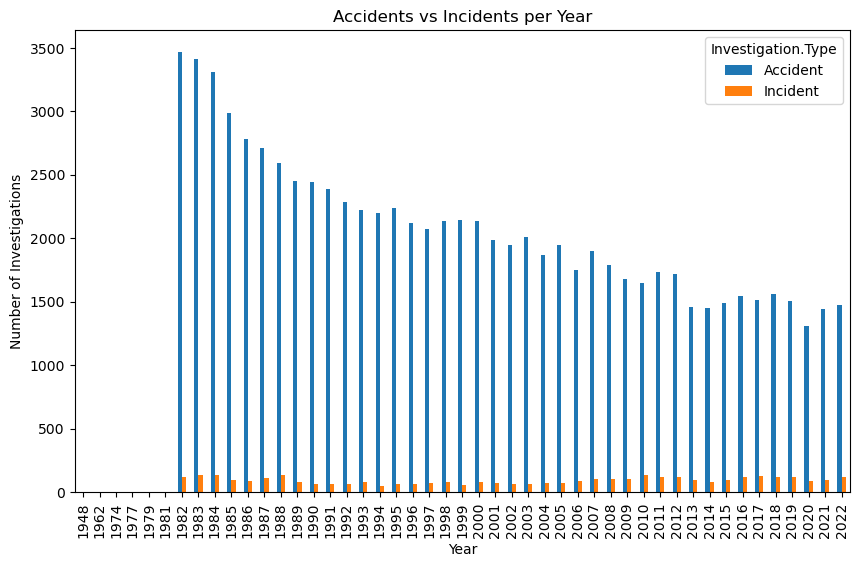

In [108]:
# 3.2 : Plot the bar graph
df_counts.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Accidents vs Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Investigations')

# Show the plot
plt.show()


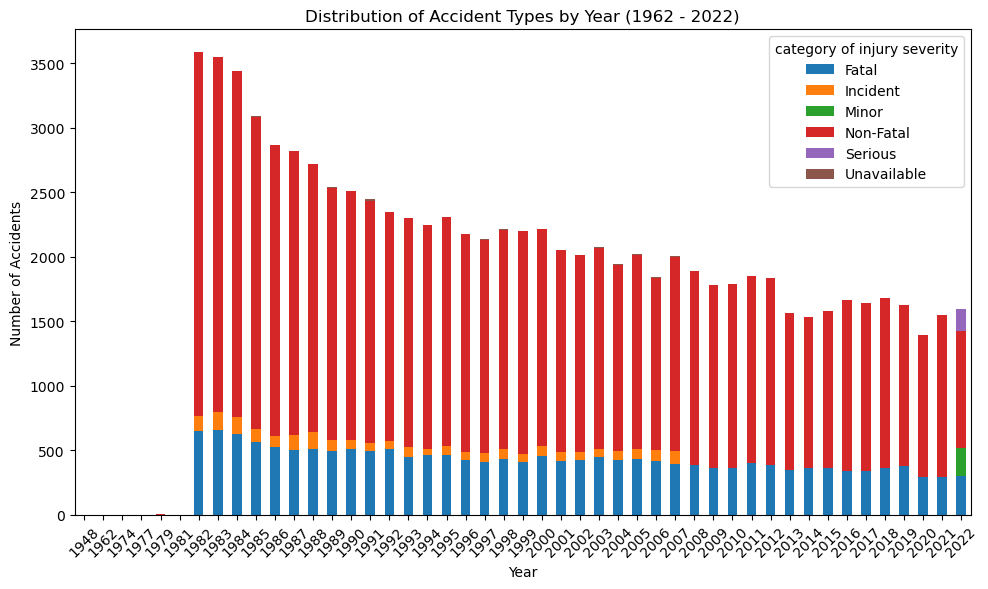

In [109]:
#3.3 : Create a plot showing the category of injury severity over the years due to aircraft accidents or incidents
df_grouped = df_analyses.groupby(['year_of_event', 'category_injury_severity']).size().reset_index(name='Count')

# Pivot the table to have Accident_Type as columns and Year as index
df_pivot = df_grouped.pivot(index='year_of_event', columns='category_injury_severity', values='Count').fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
df_pivot.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Distribution of Accident Types by Year (1962 - 2022)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='category of injury severity')
plt.tight_layout()

plt.show()

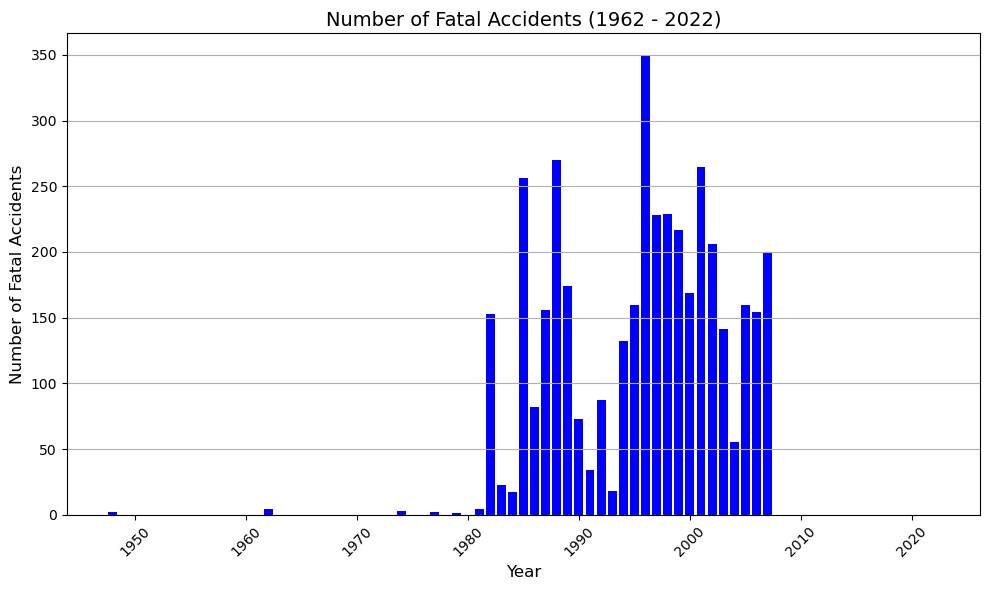

In [110]:
# 3. 4 : Create plot showing number of fatality over the years
plt.figure(figsize=(10, 6))
plt.bar(df_analyses['year_of_event'], df_analyses['number_of_fatality'], color='blue')

plt.title('Number of Fatal Accidents (1962 - 2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Fatal Accidents', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

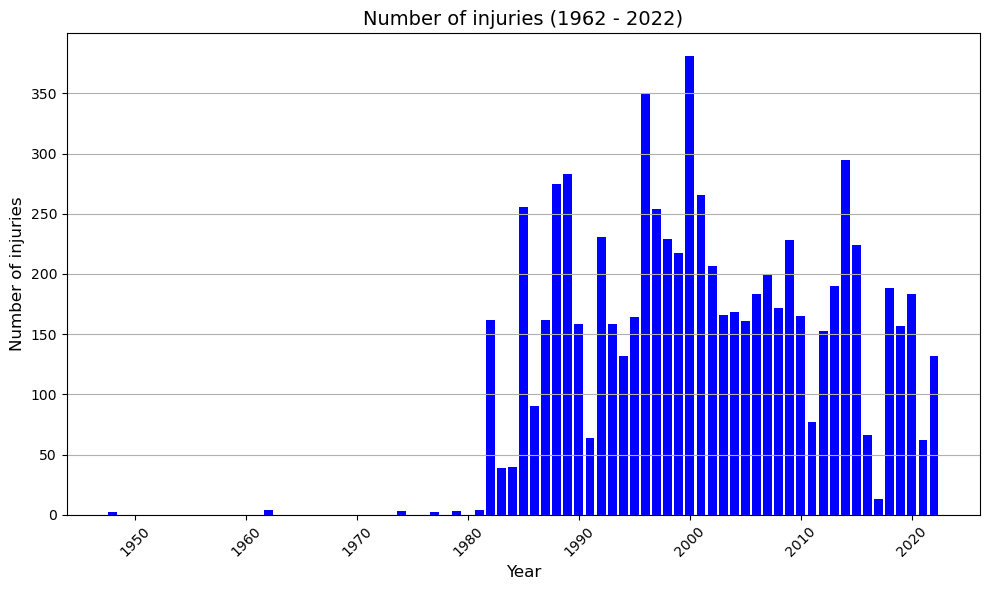

In [111]:
# 3.5 Create plot showing the Total Injuries over the years
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_analyses['year_of_event'], df_analyses['Total.Injuries'], color='blue')

plt.title('Number of injuries (1962 - 2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of injuries', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

#### 1. CONCLUSION AND RECOMENDATION
 * Accidents and Incidences according to the first plot have significantly reduced over the years
 * Fatalities and Injuries show an omost similar trajection however we see that starting in the years after 2010 there seems to be less fatalities and Injuries
 * We also note that the is a high level of fatalities and injuries from the 1990s to 2000s mainly because of increased aircraft activity with advancement in technology
 * It is therefore recommended that we anticipate however much less accidents in the future therefore less risks

#### B) Create plots that answer the Second Question question:
  * Which purposes for using an aircraft exhbit the lowest risk?

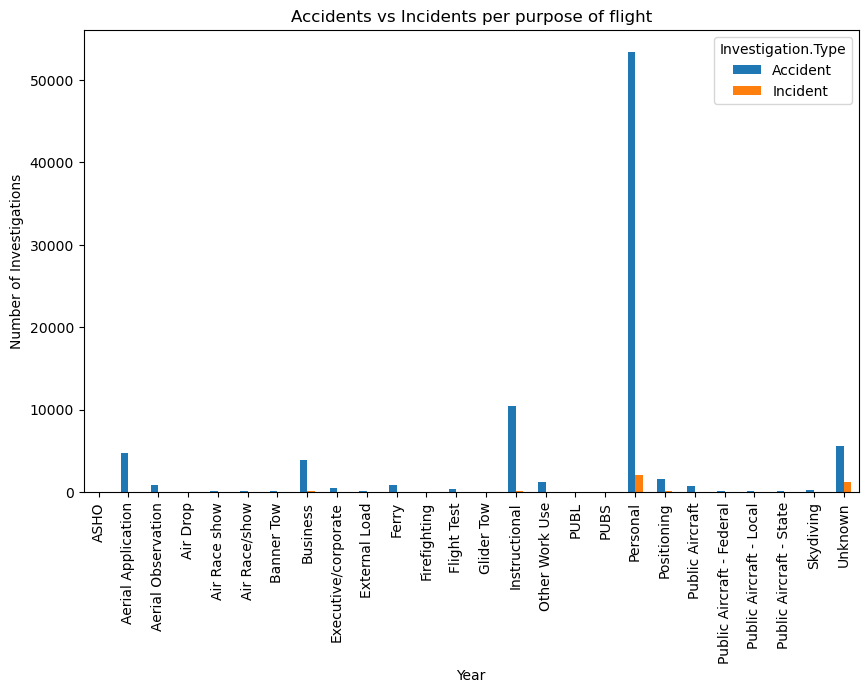

In [114]:
# 3.6 Create Plot a graph showing which purposes have the most Accidents and Incidences
df_counts_purpose = df_analyses.groupby(['Purpose.of.flight2', 'Investigation.Type']).size().unstack(fill_value=0)
df_counts_purpose.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Accidents vs Incidents per purpose of flight')
plt.xlabel('Year')
plt.ylabel('Number of Investigations')

# Show the plot
plt.show()

#### 2. CONCLUSION AND RECOMENDATION
 * We can now see that most of the accidents observed are highly related to aircrafts used for personal purposes
 * It is therefore recommended that we venture into aircraft business outside personal purposes e.g Commercial purposes as these have much less accidents and less risks

#### C) Create plots that answer the Third Question question:
           * Which type of aircraft it tired to the lower risks (Accidents, Injuries and Fatalities)?
        

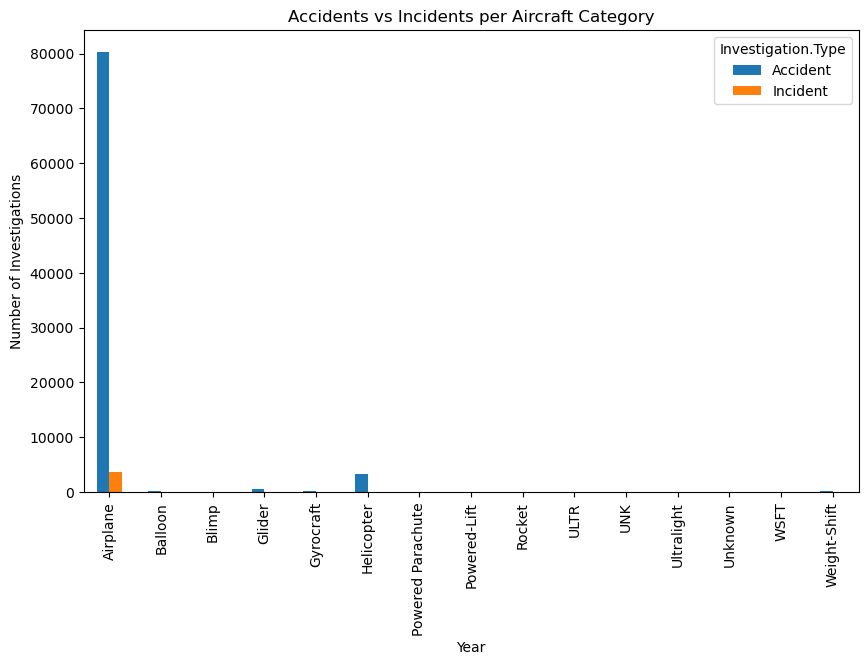

In [117]:
# 3.8 Create Plot a graph showing which Aircraft category have the most Accidents and Incidences
df_counts_aircraft_catg = df_analyses.groupby(['Aircraft.Category2', 'Investigation.Type']).size().unstack(fill_value=0)
df_counts_aircraft_catg.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Accidents vs Incidents per Aircraft Category')
plt.xlabel('Year')
plt.ylabel('Number of Investigations')

# Show the plot
plt.show()

C:\Users\tracy\AppData\Local\Temp\ipykernel_14932\3523977320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_analyses['Aircraft.Category2'], y=df_analyses['number_of_fatality'], data=df, palette='Blues_d')


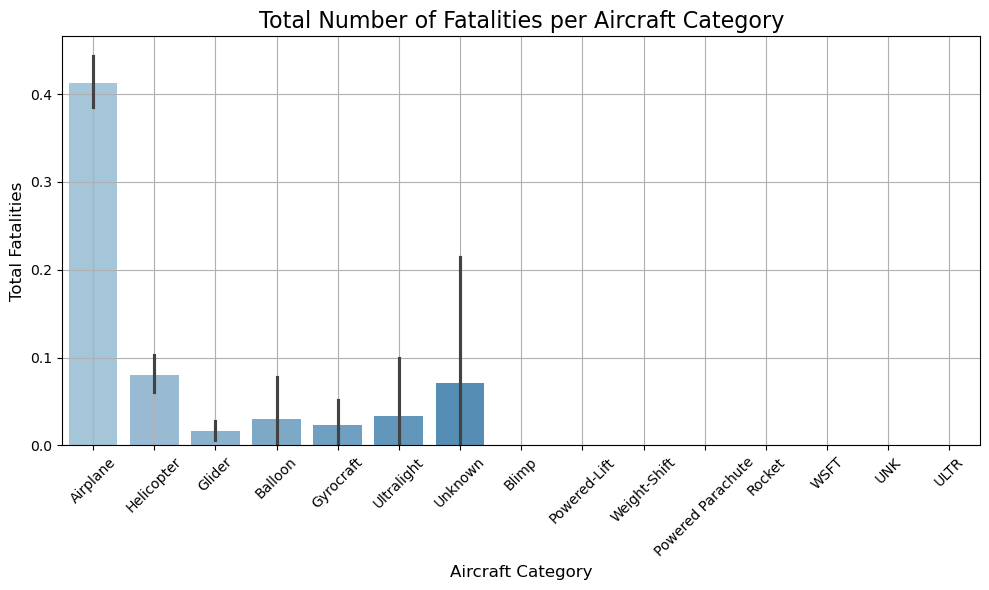

In [118]:
# 3.9 Create Plot a graph showing which Aircraft category have the most fatalities
plt.figure(figsize=(10, 6))
sns.barplot(x=df_analyses['Aircraft.Category2'], y=df_analyses['number_of_fatality'], data=df, palette='Blues_d')

plt.title('Total Number of Fatalities per Aircraft Category', fontsize=16)
plt.xlabel('Aircraft Category', fontsize=12)
plt.ylabel('Total Fatalities', fontsize=12)
plt.xticks(rotation=45)  # Rotate category labels if necessary
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\tracy\AppData\Local\Temp\ipykernel_14932\969809588.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_analyses['Aircraft.Category2'], y=df_analyses['Total.Injuries'], data=df, palette='Blues_d')


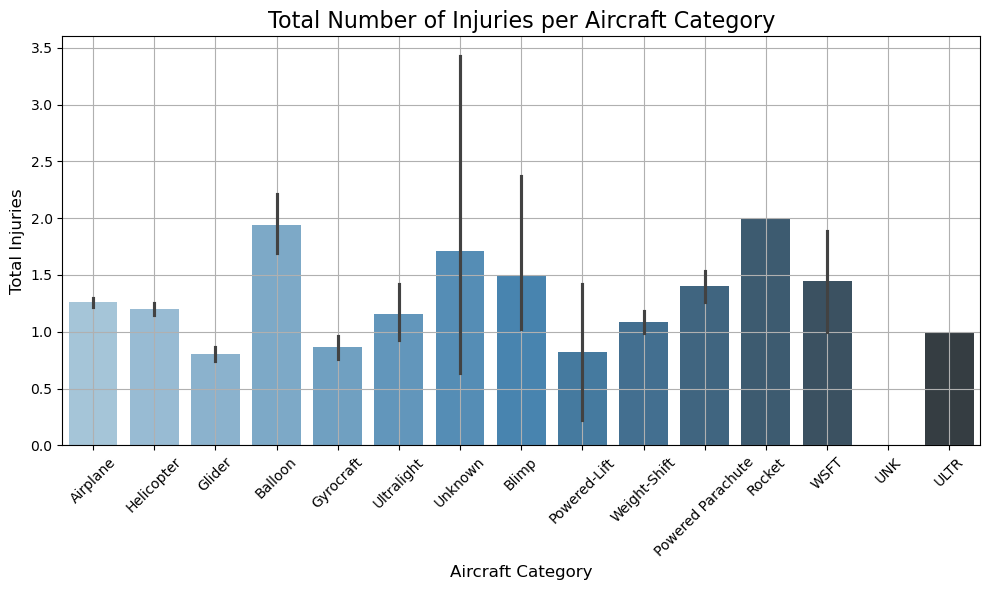

In [119]:
# 3.10 Create Plot a graph showing which Aircraft category have the most Injuries

plt.figure(figsize=(10, 6))
sns.barplot(x=df_analyses['Aircraft.Category2'], y=df_analyses['Total.Injuries'], data=df, palette='Blues_d')

plt.title('Total Number of Injuries per Aircraft Category', fontsize=16)
plt.xlabel('Aircraft Category', fontsize=12)
plt.ylabel('Total Injuries', fontsize=12)
plt.xticks(rotation=45)  # Rotate category labels if necessary
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

#### 3. CONCLUSION AND RECOMENDATION
 * We can now see that most of the accidents observed are highly related to Airplanes
 * It is therefore recommended that we venture into aircraft business outside using Airplanes or less of Airplanes these have much less accidents and less risks

#### More Analysis can be done to capture more details 
#### A tabluea dashboard will enable more interactiveness
#### Download the new data created from this analysis


In [122]:
#df_analyses.to_csv("location"+"file_name.csv")
#df_analyses.to_csv('UpdatedAviation.csv')

TABLEAU : https://public.tableau.com/app/profile/tracy.rotich/viz/learn-wb-2024-09-TC2/AVAITIONINDUSTRYANALYTICS?publish=yes